In [1]:
import pandas as pd

# Change path to your file
EXCEL_PATH = "C:\\Users\\Aman Bisen\\Desktop\\food_reviews.xlsx"

# Load the Excel file (shows sheets if multiple)
xls = pd.ExcelFile(EXCEL_PATH, engine='openpyxl')
print("Sheets:", xls.sheet_names)

# Load the first sheet by default; change sheet_name if needed
df = pd.read_excel(EXCEL_PATH, sheet_name=xls.sheet_names[0], engine='openpyxl')

# Display first 10 rows and shape of the dataframe
print(df.head(10))
print("Shape of DataFrame:", df.shape)


Sheets: ['Sheet1']
   Review_ID                                 Review_Text
0          1         Excellent taste and quick delivery.
1          2             The food arrived cold and late.
2          3         Bad experience, food was tasteless.
3          4  Very satisfied with the quality and speed.
4          5     Not satisfied, the order was messed up.
5          6              Highly recommend this service!
6          7  Would not order again, very disappointing.
7          8  Loved the packaging and freshness of food.
8          9    Service was decent, nothing outstanding.
9         10  Would not order again, very disappointing.
Shape of DataFrame: (1000, 2)


In [5]:
import pandas as pd
from textblob import TextBlob

# --- Step 1: Verify these variables ---
input_file_name = r"C:\Users\Aman Bisen\Desktop\food_reviews.xlsx"
column_to_analyze = 'Review_Text'
output_file_name = 'reviews_sentiment.xlsx'

# --- Step 2: Run the Analysis ---
try:
    # Load the Excel file
    df = pd.read_excel(input_file_name)
    print(f"Successfully loaded '{input_file_name}'. Shape: {df.shape}")

    # --- Data Validation ---
    if column_to_analyze not in df.columns:
        raise KeyError(f"The column '{column_to_analyze}' was not found in your file.")

    df[column_to_analyze] = df[column_to_analyze].astype(str)
    print(f"Ready to analyze the content of the '{column_to_analyze}' column.")

    # --- Sentiment Analysis Functions ---
    def get_sentiment_score(text):
        return TextBlob(text).sentiment.polarity

    def get_sentiment_category(score):
        if score > 0.05:
            return 'Positive'
        elif score < -0.05:
            return 'Negative'
        else:
            return 'Neutral'

    # Apply functions
    df['sentiment_score'] = df[column_to_analyze].apply(get_sentiment_score)
    df['sentiment_category'] = df['sentiment_score'].apply(get_sentiment_category)

    # Save results
    df.to_excel(output_file_name, index=False)
    print(f"\nSUCCESS! Analysis complete. Saved as '{output_file_name}'.")

    # Preview
    print("\nPreview:")
    print(df[[column_to_analyze, 'sentiment_score', 'sentiment_category']].head())
    print("\nSentiment distribution:")
    print(df['sentiment_category'].value_counts())

except FileNotFoundError:
    print(f"--- ERROR: File Not Found ---")
    print(f"The file '{input_file_name}' was not found. Check path and name.")

except KeyError as e:
    print(f"--- ERROR: Column Not Found ---\n{e}")
    print("Available columns:", df.columns.tolist())

except Exception as e:
    print(f"An unexpected error occurred: {e}")


Successfully loaded 'C:\Users\Aman Bisen\Desktop\food_reviews.xlsx'. Shape: (1000, 2)
Ready to analyze the content of the 'Review_Text' column.

SUCCESS! Analysis complete. Saved as 'reviews_sentiment.xlsx'.

Preview:
                                  Review_Text  sentiment_score  \
0         Excellent taste and quick delivery.         0.666667   
1             The food arrived cold and late.        -0.450000   
2         Bad experience, food was tasteless.        -0.650000   
3  Very satisfied with the quality and speed.         0.650000   
4     Not satisfied, the order was messed up.        -0.250000   

  sentiment_category  
0           Positive  
1           Negative  
2           Negative  
3           Positive  
4           Negative  

Sentiment distribution:
sentiment_category
Positive    588
Negative    373
Neutral      39
Name: count, dtype: int64


✅ Successfully loaded 'reviews_sentiment.xlsx'. Shape: (1000, 4)

📊 Counts of each sentiment category:
sentiment_category
Positive    588
Negative    373
Neutral      39
Name: count, dtype: int64


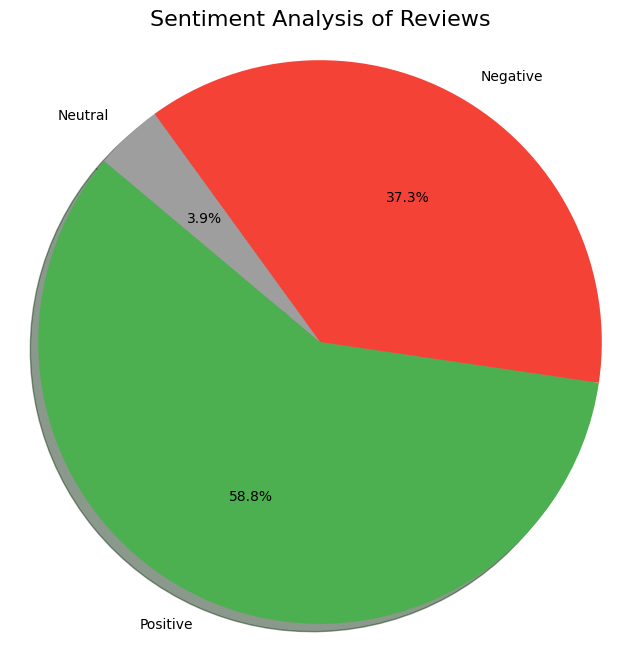

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Configuration ---
input_file_name = 'reviews_sentiment.xlsx'  # Excel file with sentiment analysis
column_to_plot = 'sentiment_category'           # Column to visualize

try:
    # 1. Load the data from the Excel file
    df = pd.read_excel(input_file_name)
    print(f"✅ Successfully loaded '{input_file_name}'. Shape: {df.shape}")

    # 2. Validate that the column exists
    if column_to_plot not in df.columns:
        raise KeyError(f"The column '{column_to_plot}' was not found in the Excel file.")
    
    # 3. Count occurrences of each sentiment category
    sentiment_counts = df[column_to_plot].value_counts()
    print("\n📊 Counts of each sentiment category:")
    print(sentiment_counts)

    # 4. Create the Pie Chart
    plt.figure(figsize=(8, 8))  # Set figure size

    # Automatically map colors to categories
    color_map = {
        'Positive': '#4CAF50',  # Green
        'Negative': '#F44336',  # Red
        'Neutral': '#9E9E9E'    # Grey
    }
    colors = [color_map.get(cat, '#2196F3') for cat in sentiment_counts.index]  # Default blue for unknown categories

    plt.pie(
        sentiment_counts,
        labels=sentiment_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        shadow=True
    )

    plt.title('Sentiment Analysis of Reviews', fontsize=16)
    plt.axis('equal')  # Ensure pie chart is circular
    plt.show()

except FileNotFoundError:
    print(f"❌ Error: The file '{input_file_name}' was not found. Check the file path and name.")

except KeyError as e:
    print(f"❌ Error: {e}")
    print("Available columns in the file:", df.columns.tolist())

except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")


In [15]:
if sentiment_counts["Positive"] > sentiment_counts["Negative"] and sentiment_counts["Positive"] > sentiment_counts["Neutral"]:
    recommendation = "Majority of customers are happy. Maintain quality and expand services."
elif sentiment_counts["Negative"] > sentiment_counts["Positive"]:
    recommendation = "High negative reviews. Focus on improving delivery speed, food freshness, and packaging."
else:
    recommendation = "Most reviews are neutral. Work on customer engagement and unique offerings."

print("Business Recommendation:", recommendation)

Business Recommendation: Majority of customers are happy. Maintain quality and expand services.


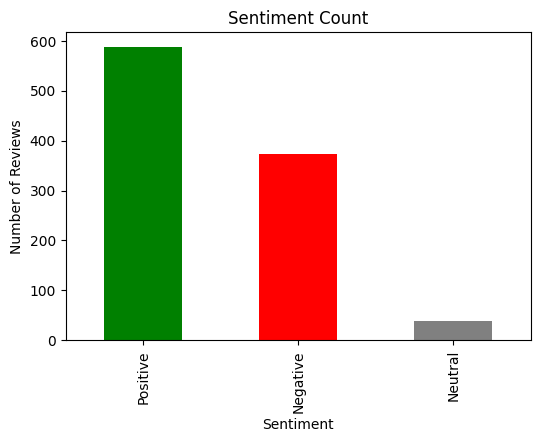

In [16]:
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind="bar", color=['green','red','gray'])
plt.title("Sentiment Count")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()